
# Illustration of transforms

This example illustrates some of the various transforms available in `the
torchvision.transforms.v2 module <transforms>`.


In [1]:
%pip install pillow matplotlib torch torchvision helpers

Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

import torch
from torchvision.transforms import v2

plt.rcParams["savefig.bbox"] = 'tight'

# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)

orig_img = Image.open(Path('./data/train-faces/F0001/MID2') / 'P00001_face1.jpg')

## Geometric Transforms
Geometric image transformation refers to the process of altering the geometric properties of an image,
such as its shape, size, orientation, or position.
It involves applying mathematical operations to the image pixels or coordinates to achieve the desired transformation.

### Pad
The :class:`~torchvision.transforms.Pad` transform
(see also :func:`~torchvision.transforms.functional.pad`)
pads all image borders with some pixel values.



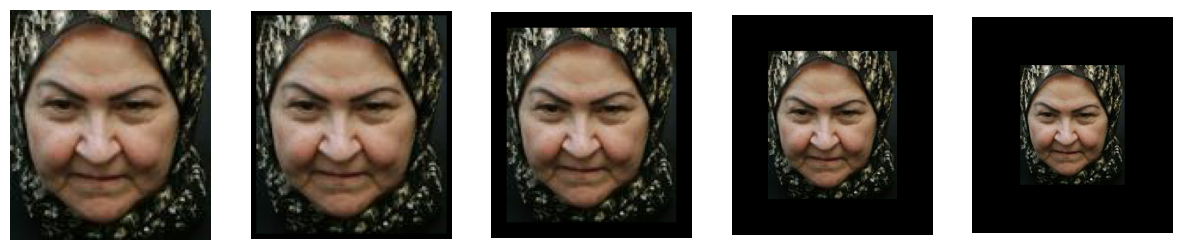

In [4]:
padded_imgs = [v2.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
all_imgs = [orig_img] + padded_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

### Resize
The :class:`~torchvision.transforms.Resize` transform
(see also :func:`~torchvision.transforms.functional.resize`)
resizes an image.



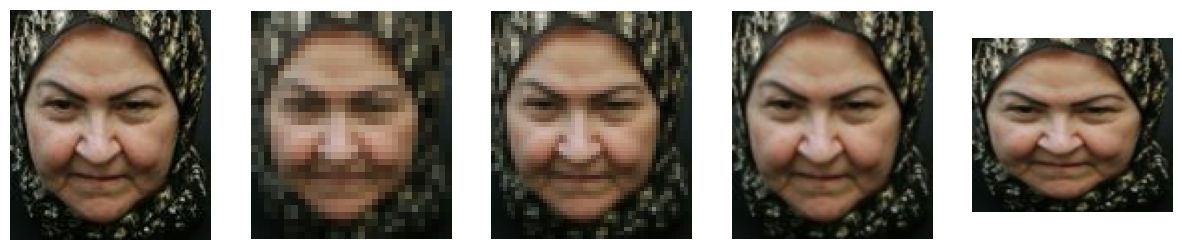

In [5]:
resized_imgs = [v2.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
all_imgs = [orig_img] + resized_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### CenterCrop
The :class:`~torchvision.transforms.CenterCrop` transform
(see also :func:`~torchvision.transforms.functional.center_crop`)
crops the given image at the center.



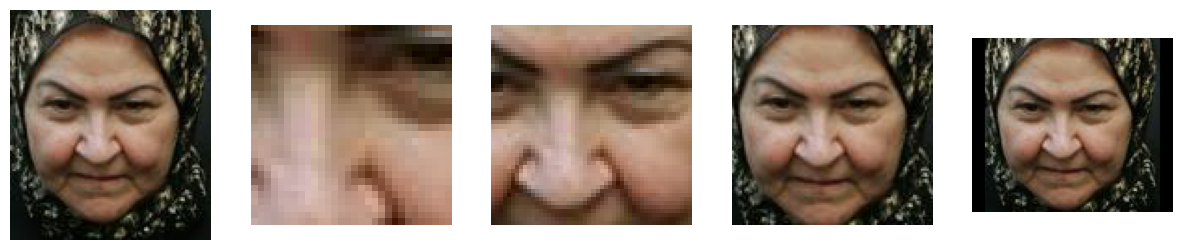

In [6]:
center_crops = [v2.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
all_imgs = [orig_img] + center_crops  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### FiveCrop
The :class:`~torchvision.transforms.FiveCrop` transform
(see also :func:`~torchvision.transforms.functional.five_crop`)
crops the given image into four corners and the central crop.



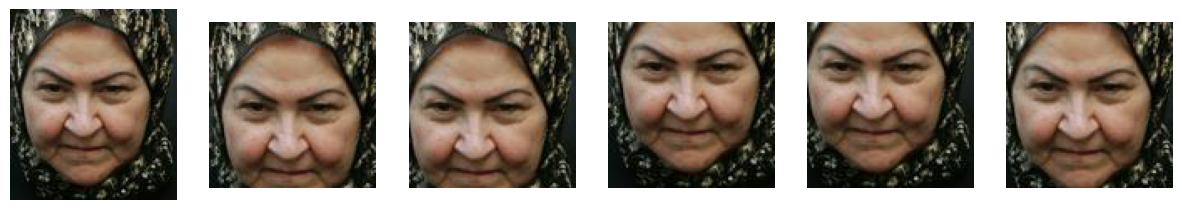

In [7]:
(top_left, top_right, bottom_left, bottom_right, center) = v2.FiveCrop(size=(100, 100))(orig_img)
all_imgs = [orig_img, top_left, top_right, bottom_left, bottom_right, center]

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomPerspective
The :class:`~torchvision.transforms.RandomPerspective` transform
(see also :func:`~torchvision.transforms.functional.perspective`)
performs random perspective transform on an image.



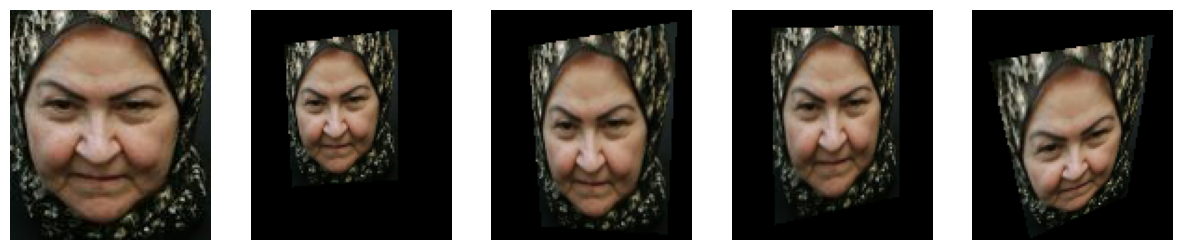

In [8]:
perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
all_imgs = [orig_img] + perspective_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomRotation
The :class:`~torchvision.transforms.RandomRotation` transform
(see also :func:`~torchvision.transforms.functional.rotate`)
rotates an image with random angle.



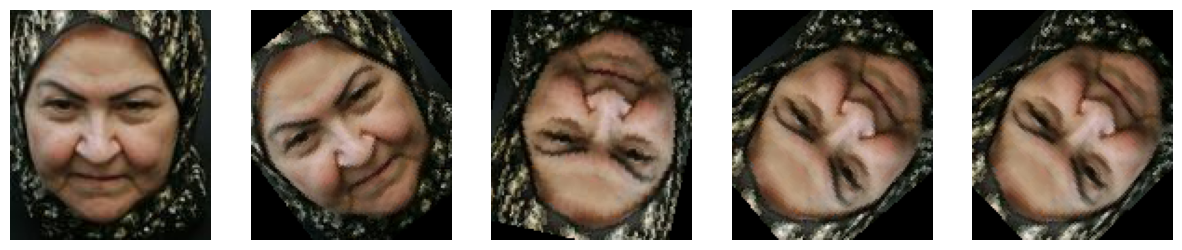

In [9]:
rotater = v2.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
all_imgs = [orig_img] + rotated_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomAffine
The :class:`~torchvision.transforms.RandomAffine` transform
(see also :func:`~torchvision.transforms.functional.affine`)
performs random affine transform on an image.



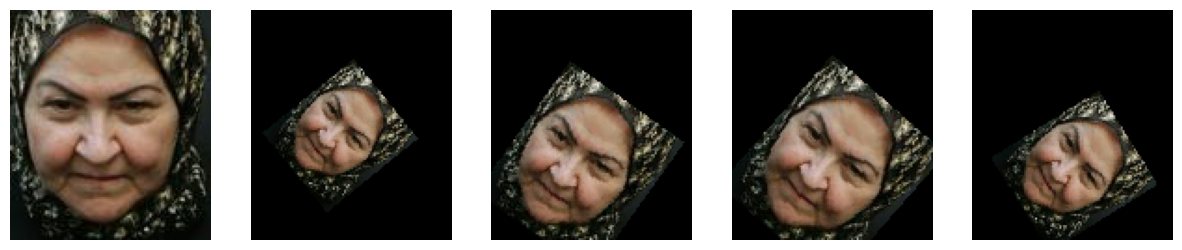

In [10]:
affine_transfomer = v2.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
all_imgs = [orig_img] + affine_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### ElasticTransform
The :class:`~torchvision.transforms.ElasticTransform` transform
(see also :func:`~torchvision.transforms.functional.elastic_transform`)
Randomly transforms the morphology of objects in images and produces a
see-through-water-like effect.



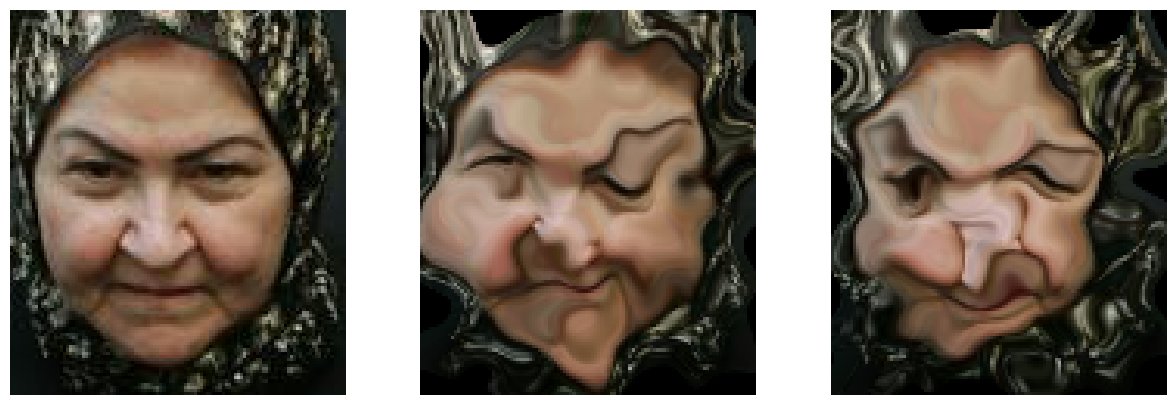

In [11]:
elastic_transformer = v2.ElasticTransform(alpha=250.0)
transformed_imgs = [elastic_transformer(orig_img) for _ in range(2)]
all_imgs = [orig_img] + transformed_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomCrop
The :class:`~torchvision.transforms.RandomCrop` transform
(see also :func:`~torchvision.transforms.functional.crop`)
crops an image at a random location.



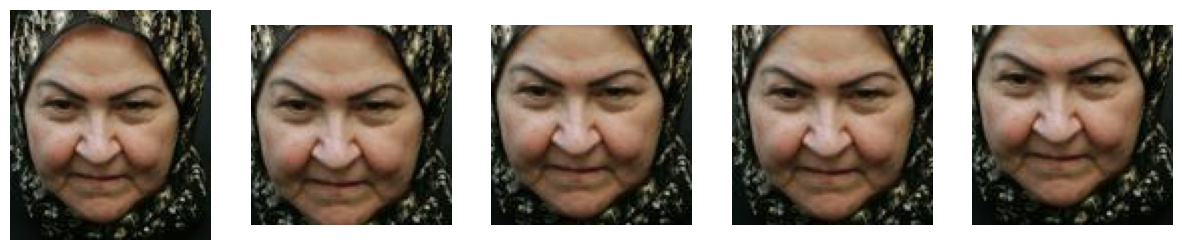

In [12]:
cropper = v2.RandomCrop(size=(100, 100))
crops = [cropper(orig_img) for _ in range(4)]
all_imgs = [orig_img] + crops  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomResizedCrop
The :class:`~torchvision.transforms.RandomResizedCrop` transform
(see also :func:`~torchvision.transforms.functional.resized_crop`)
crops an image at a random location, and then resizes the crop to a given
size.



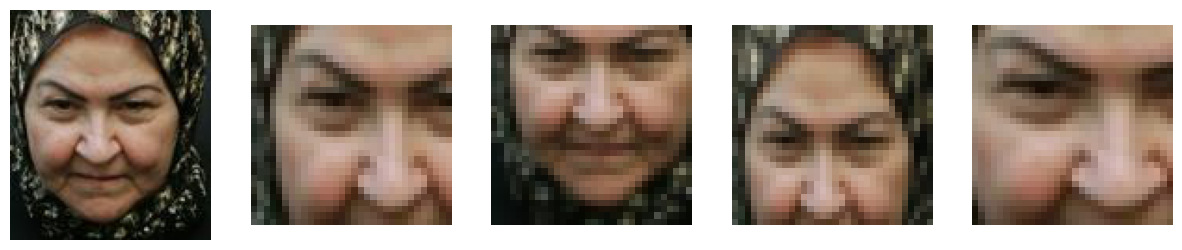

In [13]:
resize_cropper = v2.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
all_imgs = [orig_img] + resized_crops  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

## Photometric Transforms
Photometric image transformation refers to the process of modifying the photometric properties of an image,
such as its brightness, contrast, color, or tone.
These transformations are applied to change the visual appearance of an image
while preserving its geometric structure.

Except :class:`~torchvision.transforms.Grayscale`, the following transforms are random,
which means that the same transform
instance will produce different result each time it transforms a given image.

### Grayscale
The :class:`~torchvision.transforms.Grayscale` transform
(see also :func:`~torchvision.transforms.functional.to_grayscale`)
converts an image to grayscale



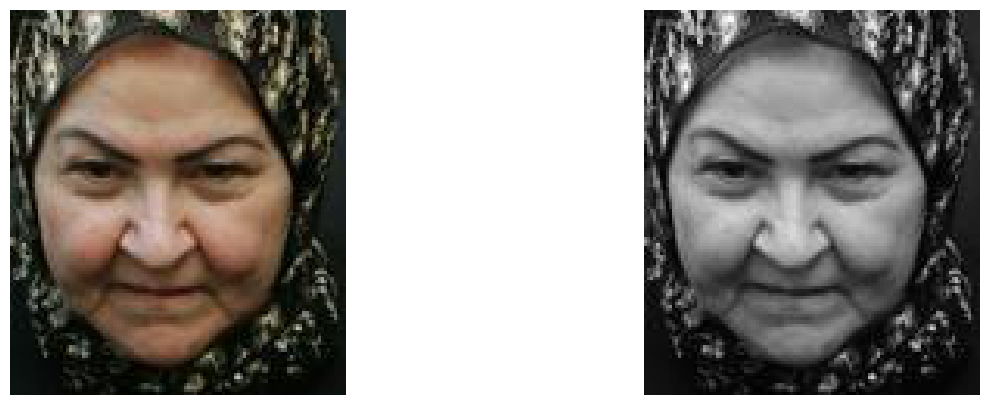

In [14]:
gray_img = v2.Grayscale()(orig_img)
all_imgs = [orig_img, gray_img]

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

### ColorJitter
The :class:`~torchvision.transforms.ColorJitter` transform
randomly changes the brightness, contrast, saturation, hue, and other properties of an image.



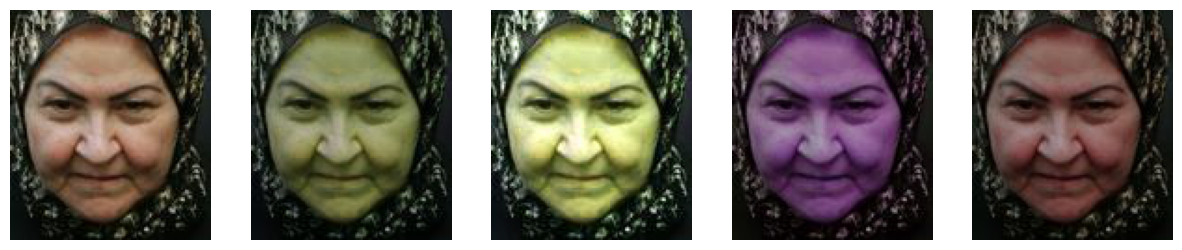

In [15]:
jitter = v2.ColorJitter(brightness=.5, hue=.3)
jittered_imgs = [jitter(orig_img) for _ in range(4)]
all_imgs = [orig_img] + jittered_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### GaussianBlur
The :class:`~torchvision.transforms.GaussianBlur` transform
(see also :func:`~torchvision.transforms.functional.gaussian_blur`)
performs gaussian blur transform on an image.



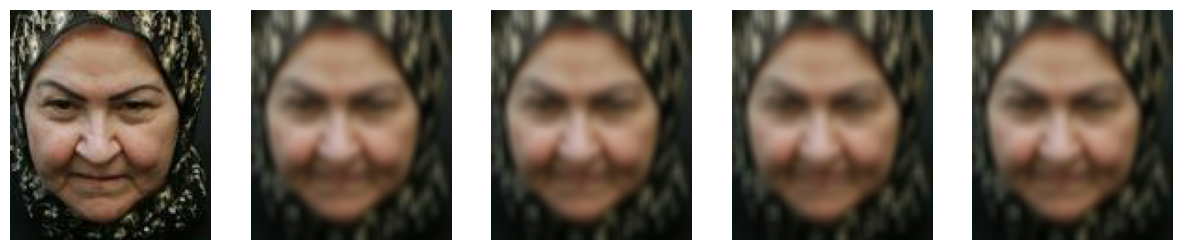

In [16]:
blurrer = v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
all_imgs = [orig_img] + blurred_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomInvert
The :class:`~torchvision.transforms.RandomInvert` transform
(see also :func:`~torchvision.transforms.functional.invert`)
randomly inverts the colors of the given image.



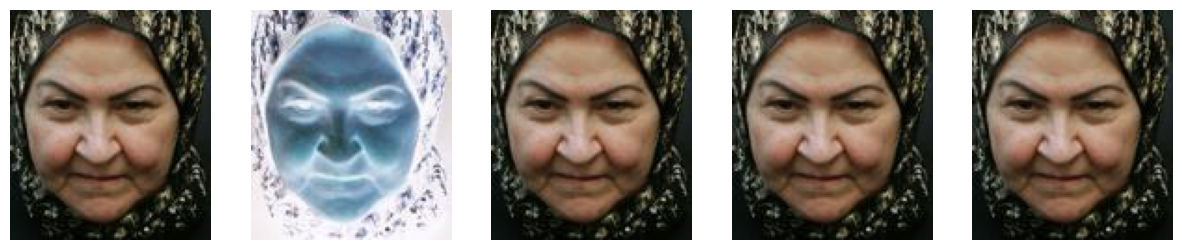

In [17]:
inverter = v2.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
all_imgs = [orig_img] + invertered_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomPosterize
The :class:`~torchvision.transforms.RandomPosterize` transform
(see also :func:`~torchvision.transforms.functional.posterize`)
randomly posterizes the image by reducing the number of bits
of each color channel.



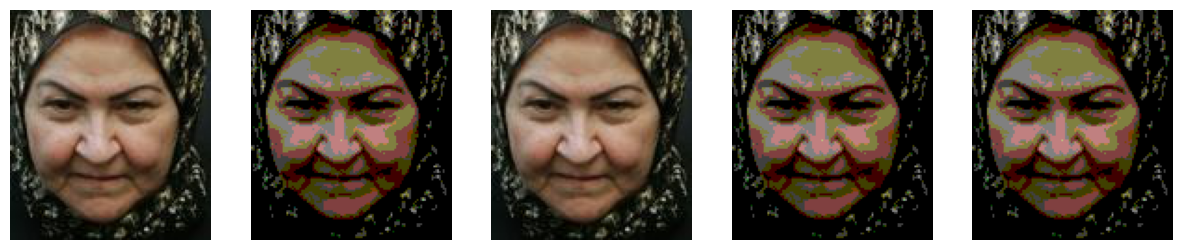

In [18]:
posterizer = v2.RandomPosterize(bits=2)
posterized_imgs = [posterizer(orig_img) for _ in range(4)]
all_imgs = [orig_img] + posterized_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomSolarize
The :class:`~torchvision.transforms.RandomSolarize` transform
(see also :func:`~torchvision.transforms.functional.solarize`)
randomly solarizes the image by inverting all pixel values above
the threshold.



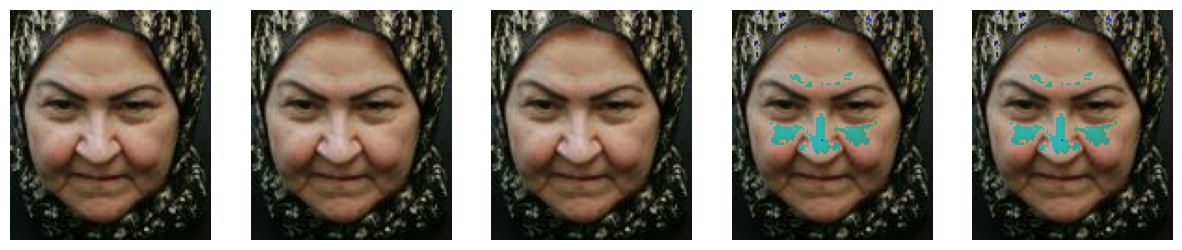

In [19]:
solarizer = v2.RandomSolarize(threshold=192.0)
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
all_imgs = [orig_img] + solarized_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomAdjustSharpness
The :class:`~torchvision.transforms.RandomAdjustSharpness` transform
(see also :func:`~torchvision.transforms.functional.adjust_sharpness`)
randomly adjusts the sharpness of the given image.



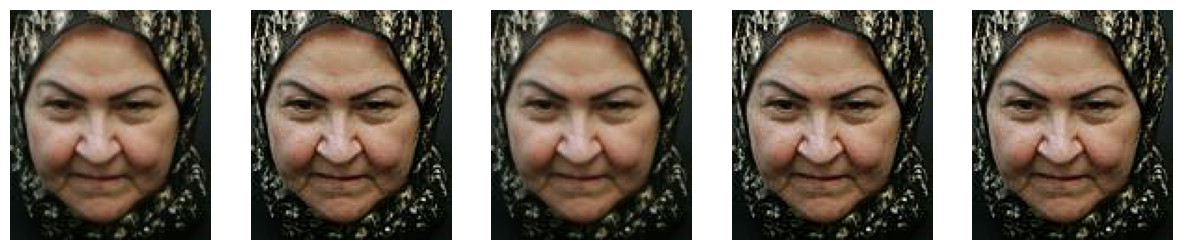

In [20]:
sharpness_adjuster = v2.RandomAdjustSharpness(sharpness_factor=2)
sharpened_imgs = [sharpness_adjuster(orig_img) for _ in range(4)]
all_imgs = [orig_img] + sharpened_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomAutocontrast
The :class:`~torchvision.transforms.RandomAutocontrast` transform
(see also :func:`~torchvision.transforms.functional.autocontrast`)
randomly applies autocontrast to the given image.



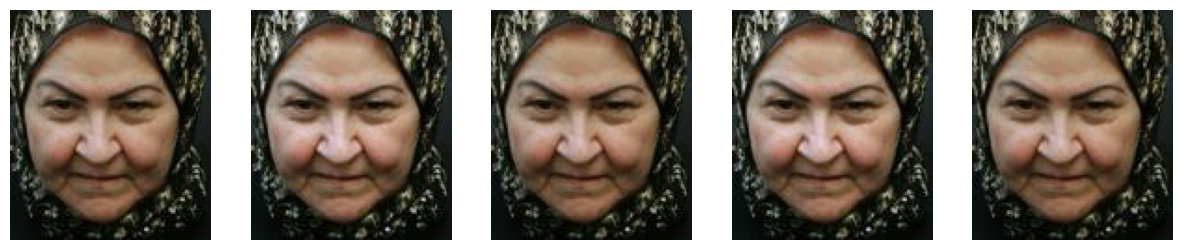

In [21]:
autocontraster = v2.RandomAutocontrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
all_imgs = [orig_img] + autocontrasted_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomEqualize
The :class:`~torchvision.transforms.RandomEqualize` transform
(see also :func:`~torchvision.transforms.functional.equalize`)
randomly equalizes the histogram of the given image.



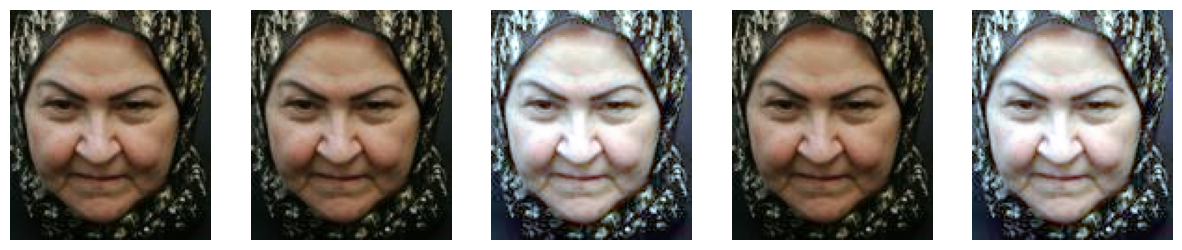

In [22]:
equalizer = v2.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
all_imgs = [orig_img] + equalized_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### JPEG
The :class:`~torchvision.transforms.v2.JPEG` transform
(see also :func:`~torchvision.transforms.v2.functional.jpeg`)
applies JPEG compression to the given image with random
degree of compression.



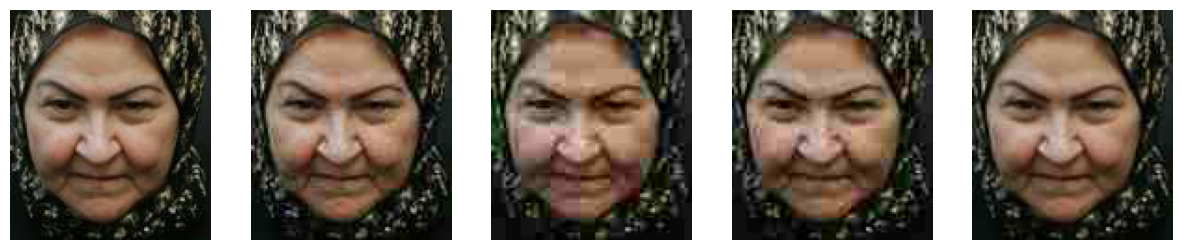

In [23]:
jpeg = v2.JPEG((5, 50))
jpeg_imgs = [jpeg(orig_img) for _ in range(4)]
all_imgs = [orig_img] + jpeg_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

## Augmentation Transforms
The following transforms are combinations of multiple transforms,
either geometric or photometric, or both.

### AutoAugment
The :class:`~torchvision.transforms.AutoAugment` transform
automatically augments data based on a given auto-augmentation policy.
See :class:`~torchvision.transforms.AutoAugmentPolicy` for the available policies.



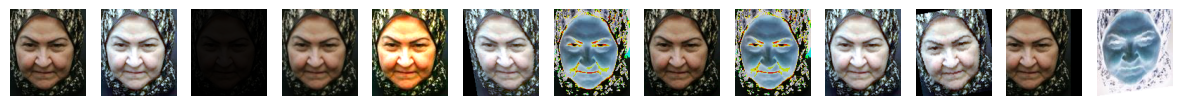

In [24]:
policies = [v2.AutoAugmentPolicy.CIFAR10, v2.AutoAugmentPolicy.IMAGENET, v2.AutoAugmentPolicy.SVHN]
augmenters = [v2.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]

all_imgs = [orig_img] + sum(imgs, [])

#Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandAugment
The :class:`~torchvision.transforms.RandAugment` is an alternate version of AutoAugment.



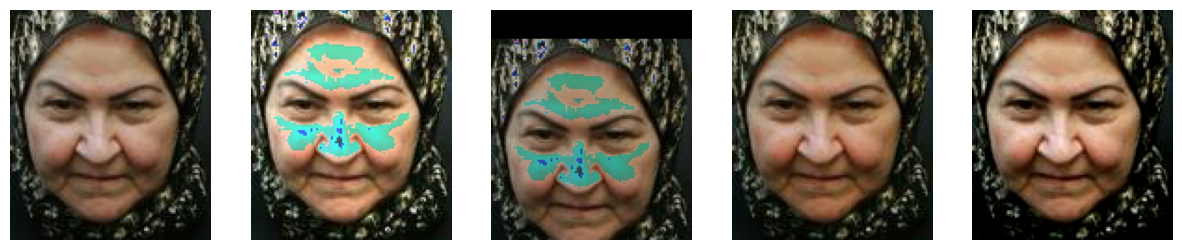

In [25]:
augmenter = v2.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
all_imgs = [orig_img] + imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### TrivialAugmentWide
The :class:`~torchvision.transforms.TrivialAugmentWide` is an alternate implementation of AutoAugment.
However, instead of transforming an image multiple times, it transforms an image only once
using a random transform from a given list with a random strength number.



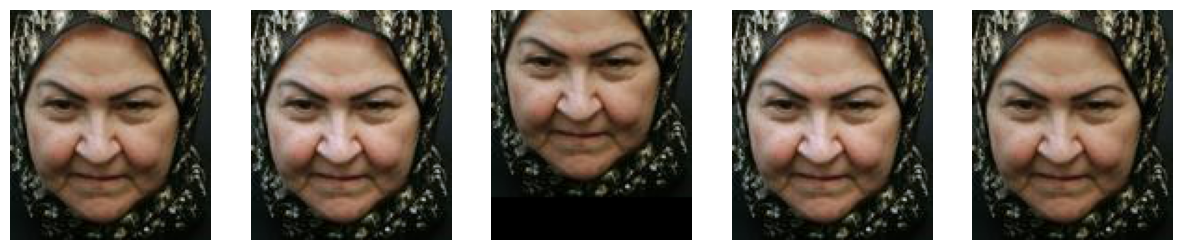

In [26]:
augmenter = v2.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
all_imgs = [orig_img] + imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### AugMix
The :class:`~torchvision.transforms.AugMix` transform interpolates between augmented versions of an image.



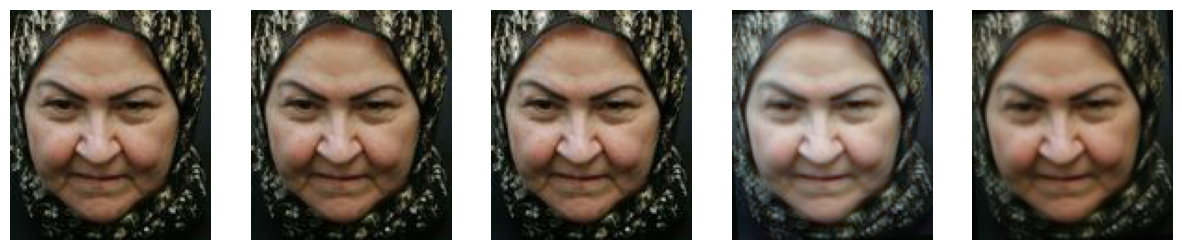

In [27]:
augmenter = v2.AugMix()
imgs = [augmenter(orig_img) for _ in range(4)]
all_imgs = [orig_img] + imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

## Randomly-applied Transforms

The following transforms are randomly-applied given a probability ``p``.  That is, given ``p = 0.5``,
there is a 50% chance to return the original image, and a 50% chance to return the transformed image,
even when called with the same transform instance!

### RandomHorizontalFlip
The :class:`~torchvision.transforms.RandomHorizontalFlip` transform
(see also :func:`~torchvision.transforms.functional.hflip`)
performs horizontal flip of an image, with a given probability.



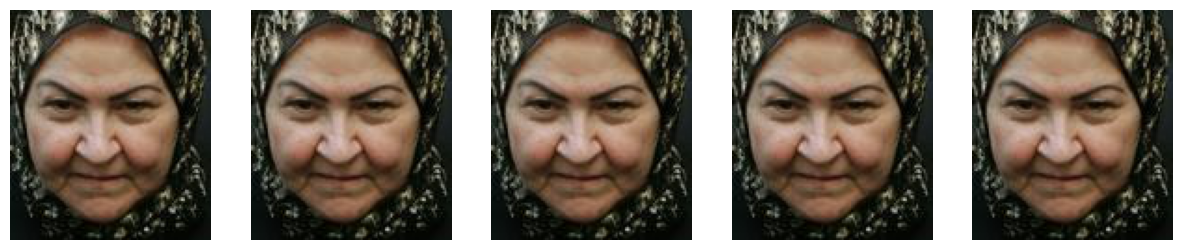

In [28]:
hflipper = v2.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
all_imgs = [orig_img] + transformed_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomVerticalFlip
The :class:`~torchvision.transforms.RandomVerticalFlip` transform
(see also :func:`~torchvision.transforms.functional.vflip`)
performs vertical flip of an image, with a given probability.



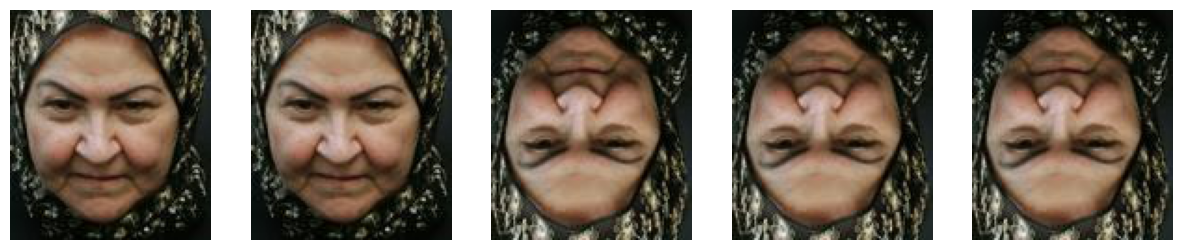

In [29]:
vflipper = v2.RandomVerticalFlip(p=0.5)
transformed_imgs = [vflipper(orig_img) for _ in range(4)]
all_imgs = [orig_img] + transformed_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

### RandomApply
The :class:`~torchvision.transforms.RandomApply` transform
randomly applies a list of transforms, with a given probability.



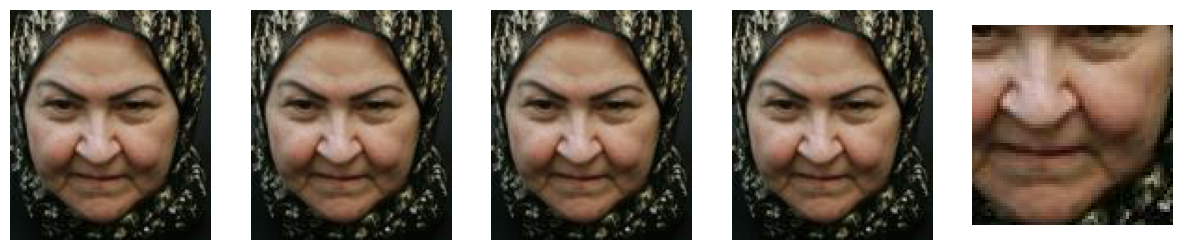

In [30]:
applier = v2.RandomApply(transforms=[v2.RandomCrop(size=(64, 64))], p=0.5)
transformed_imgs = [applier(orig_img) for _ in range(4)]
all_imgs = [orig_img] + transformed_imgs  # Include the original image

# Plotting all images in a single row
plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
for i, img in enumerate(all_imgs):
    plt.subplot(1, len(all_imgs), i + 1)
    plt.imshow(img)
    plt.axis('off')

# Apply Data agumentation to train faces

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

def find_and_augment_images(source_dir, dest_dir):
    # Ensure the destination directory exists
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Loop through all folders and subfolders
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                # Full path to the original image
                image_path = os.path.join(root, file)
                # Load image using PIL
                image = Image.open(image_path).convert('RGB')
                
                # Perform data augmentation
                augmented_images = data_augmentation(image)

                # Create the destination folder path
                relative_path = os.path.relpath(root, source_dir)
                new_folder_path = os.path.join(dest_dir, relative_path)
                if not os.path.exists(new_folder_path):
                    os.makedirs(new_folder_path)

                # Save original image
                original_image_path = os.path.join(new_folder_path, file)
                image.save(original_image_path)

                # Save augmented images
                for i, aug_image in enumerate(augmented_images):
                    new_file_name = f"{os.path.splitext(file)[0]}_aug_{i}{os.path.splitext(file)[1]}"
                    aug_image_path = os.path.join(new_folder_path, new_file_name)
                    aug_image.save(aug_image_path)

def data_augmentation(image):
    # Define the augmentations
    hflipper = transforms.RandomHorizontalFlip(p=0.5)
    equalizer = transforms.RandomEqualize()
    augmenter = transforms.RandomApply([transforms.RandomChoice([transforms.ColorJitter(), transforms.RandomGrayscale()])])
    autocontraster = transforms.RandomAutocontrast()
    jitter = transforms.ColorJitter(brightness=0.5, hue=0.3)
    grayscale = transforms.Grayscale()
    perspective_transformer = transforms.RandomPerspective(distortion_scale=0.6, p=1.0)

    # Apply augmentations
    transformed_imgs_hflip = [hflipper(image) for _ in range(1)]
    transformed_imgs_equalize = [equalizer(image) for _ in range(1)]
    transformed_imgs_augment = [augmenter(image) for _ in range(1)]
    transformed_imgs_autocontrast = [autocontraster(image) for _ in range(1)]
    transformed_imgs_jitter = [jitter(image) for _ in range(1)]
    transformed_imgs_perspective = [perspective_transformer(image) for _ in range(1)]
    gray_img = grayscale(image)

    # Combine original and augmented images
    all_imgs = (
        [image]
        + transformed_imgs_hflip
        + transformed_imgs_equalize
        + transformed_imgs_augment
        + transformed_imgs_autocontrast
        + transformed_imgs_jitter
        + transformed_imgs_perspective
        + [gray_img]
    )

    return all_imgs

In [32]:
source_directory = "data/final-train-faces/"
destination_directory = "data/final-train-faces_augmented/"
find_and_augment_images(source_directory, destination_directory)